In [1]:
try:
    output_filepath
except:
    output_filepath = '../data/processed/'

In [2]:
import os

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import networkx as nx

from src.utils.utils_networks import network_years_generator, average_degree, global_efficiency

In [3]:
df_financial = pd.DataFrame({'efficiency':[global_efficiency(g) for g in network_years_generator(output_filepath, 'A_country')], 
                   'average_degree':[average_degree(g) for g in network_years_generator(output_filepath, 'A_country')], 
                   'assortativity_coefficient':[nx.degree_pearson_correlation_coefficient(g, weight='weight') for g in network_years_generator(output_filepath, 'A_country')], 
                   'average_clustering':[nx.average_clustering(g,  weight='weight') for g in network_years_generator(output_filepath, 'A_country')],                   
                   }, index=range(2005, 2016))
df_financial = df_financial.apply(lambda x:(x - x.mean())/x.std())
df_financial['network'] = 'Financial network'

df_migration = pd.DataFrame({'efficiency':[global_efficiency(g) for g in network_years_generator(output_filepath, 'migration_network')], 
                   'average_degree':[average_degree(g) for g in network_years_generator(output_filepath, 'migration_network')], 
                   'assortativity_coefficient':[nx.degree_pearson_correlation_coefficient(g, weight='weight') for g in network_years_generator(output_filepath, 'migration_network')], 
                   'average_clustering':[nx.average_clustering(g,  weight='weight') for g in network_years_generator(output_filepath, 'migration_network')],                   
                   }, index=range(2005, 2016))
df_migration = df_migration.apply(lambda x: (x - x.mean())/x.std())
df_migration['network'] = 'Migration network'

In [4]:
df = pd.concat([df_financial, df_migration], axis=0)
df = df.reset_index().set_index(['index', 'network']).stack().reset_index()
df.columns = ['year', 'network', 'statistic', 'value'] 


<AxesSubplot:xlabel='year', ylabel='value'>

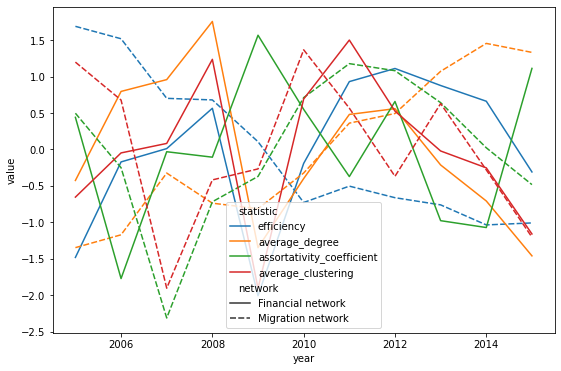

In [5]:
import seaborn as sns

fig,ax = plt.subplots(figsize = (9,6))

sns.lineplot(data=df, x="year", y="value", hue="statistic", style="network", ax=ax)